# plot.py

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

## 1. strain

In [34]:
def strain(data, sample_ID):
    plt.rcParams["font.size"]=25
    fig, ax = plt.subplots(1,1,figsize=(40,20))
    data.plot(x="Elapsed Time", ax=ax)
    ax.set_xlabel("Elapsed Time[h]", fontsize="large", fontweight="bold")
    
#     ax_t = ax.twinx()
#     data_t1.plot(x="Elapsed Time",ax = ax_t,marker = "o")
#     ax_t.set_ylabel("Temperature[$^\circ$C]", fontsize="large",fontweight="bold")
    
    ax.set_ylabel("Strain[$\mu$strain]", fontsize="large",fontweight="bold")
    ax.legend(bbox_to_anchor=(1.2,1))
    plt.subplots_adjust(left=0.1, right=0.8)
    fig.suptitle(sample_ID, fontsize="large",fontweight="bold")
    
#     fig.savefig(sample_ID + ".png")
#     plt.close(fig)
    return fig

## 2. each_dirc

In [56]:
def each_dirc(data, sample_ID, condition):
    fig = plt.figure(figsize=(35,35))
    ch = condition.loc["xx":"xz", sample_ID].dropna(how="all")
    ech = pd.DataFrame(ch.index)
    ech2 = ech[~ech.duplicated()].reset_index(drop=True)
    
    for i in range(0,len(ech2.index)):
        k = ch.at[ech2.at[i,"#"]]
        axi = fig.add_subplot(3,3,i+1)
        data.plot(x=0,y=k,ax=axi)
        axi.set_xlabel("Elapsed Time[h]", fontsize="large", fontweight="bold")
        axi.set_ylabel("Strain[$\mu$strain]", fontsize="large",fontweight="bold")
        axi.set_title(ech2.at[i,"#"])
    fig.suptitle(sample_ID + "_each_Gage",fontsize="large", fontweight="bold")
    
#     fig.savefig(sample_ID + "_each.png")
#     plt.close(fig)
    
    return fig

# テスト部分

In [21]:
from ASR import input
from ASR import manipulation

In [22]:
raw_data_csv = "./InputFiles/normal_strain.csv"
condition_csv= "./InputFiles/input.csv"
dummy_ch_csv = "./InputFiles/dummy_ch.csv"

In [23]:
a,b,c =  input.csv(raw_data_csv=raw_data_csv, condition_csv=condition_csv, dummy_ch_csv=dummy_ch_csv)

In [24]:
d = input.strain("FDB-08", a, b)
d = manipulation.offset(d)
e = input.date("FDB-08", a, b)

In [38]:
f = pd.concat([e["Elapsed Time"],d], axis=1)
f = manipulation.sma(f, 1000)

In [68]:
ee = input.dummy("FDB-08", a, b,c)
ee = manipulation.offset(ee)
du = pd.concat([e["Elapsed Time"], ee], axis=1)

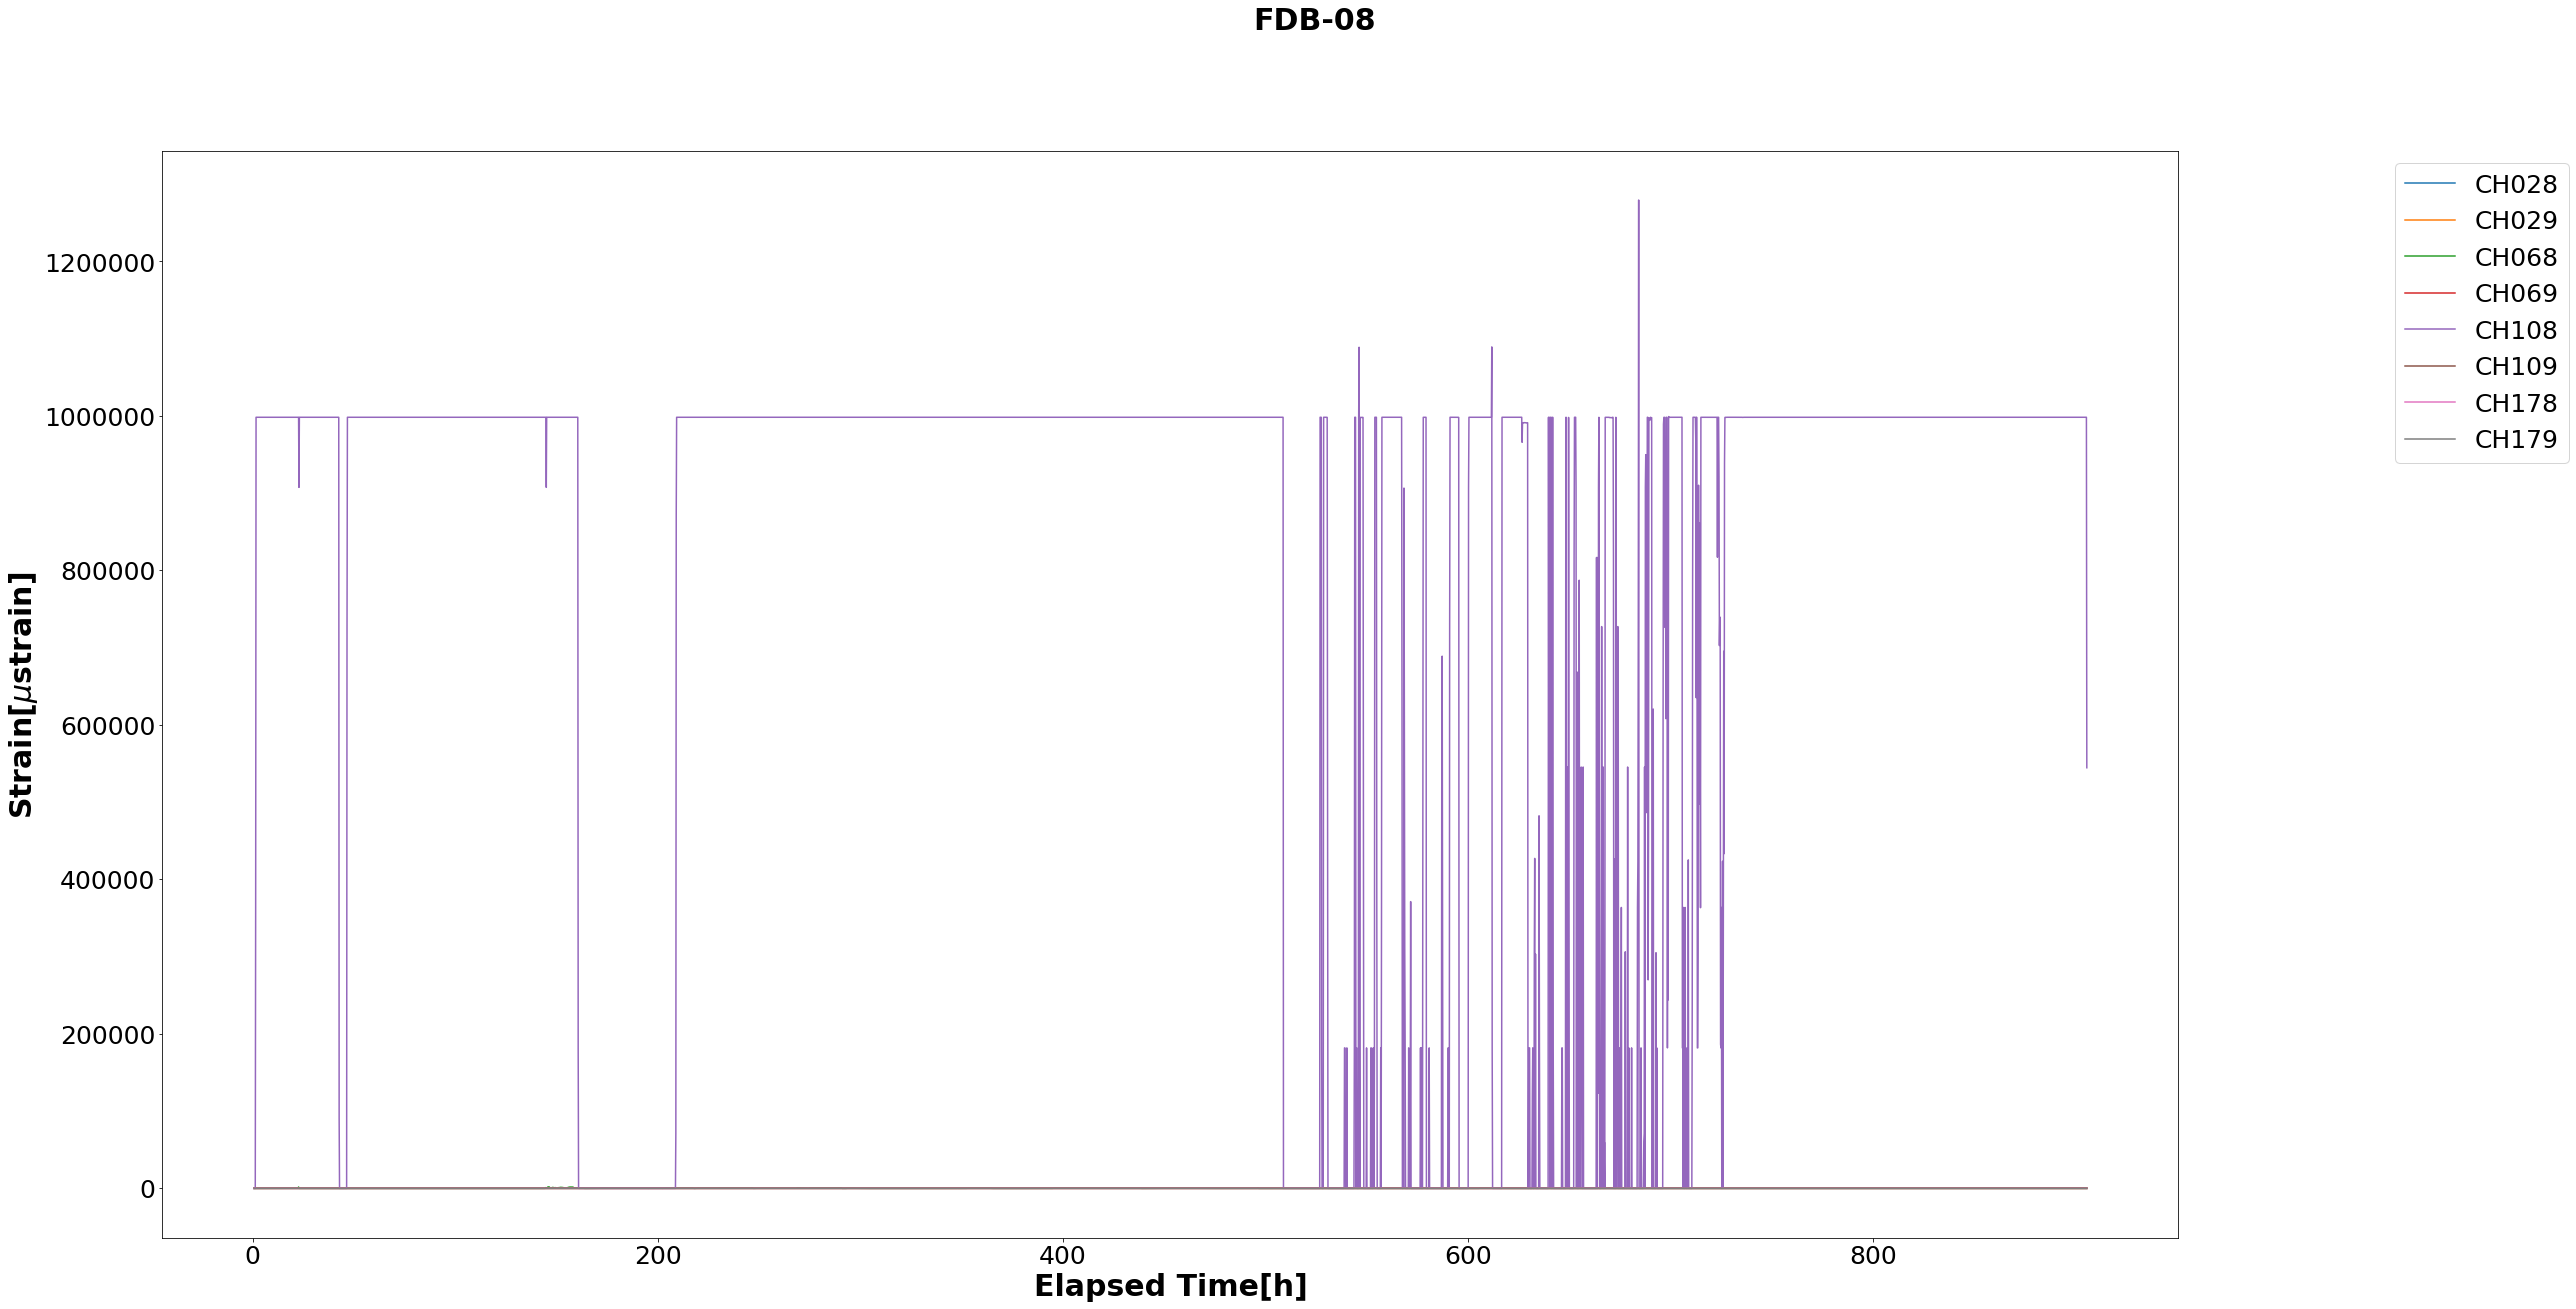

In [73]:
fig = strain(du, "FDB-08")

KeyError: "None of [Index(['CH010', 'CH011'], dtype='object')] are in the [columns]"

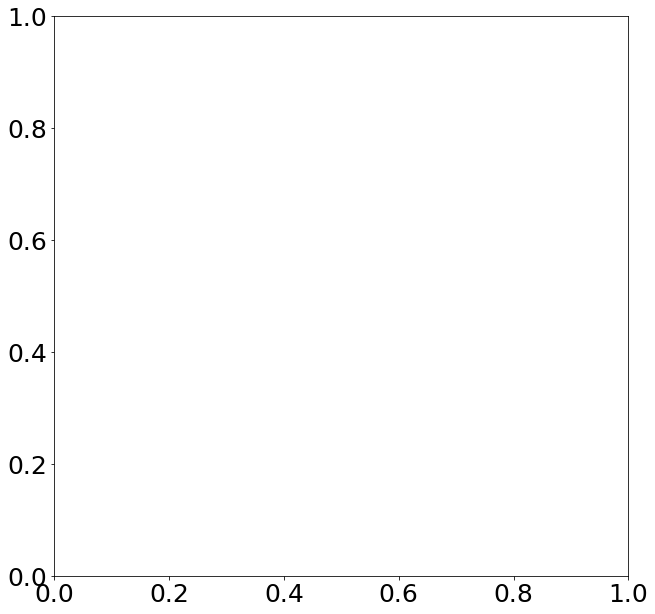

In [74]:
fig2 = each_dirc(du, "FDB-08", b)